In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("spotify.csv")

In [5]:
df.shape

(440, 5)

In [6]:
df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [7]:
df.head()

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [9]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [23]:
#Que1 
artist_popularity = df.groupby('Artist')['Popularity'].mean().reset_index()

In [37]:
top_5_artists =artist_popularity.sort_values(by='Popularity', ascending=False).head(5)

In [39]:
top_5_artists

,Artist,Popularity
113,cassö,92.000000
104,Trueno,89.000000
24,David Guetta,87.000000
103,Travis Scott,87.000000
114,¥$,86.090909


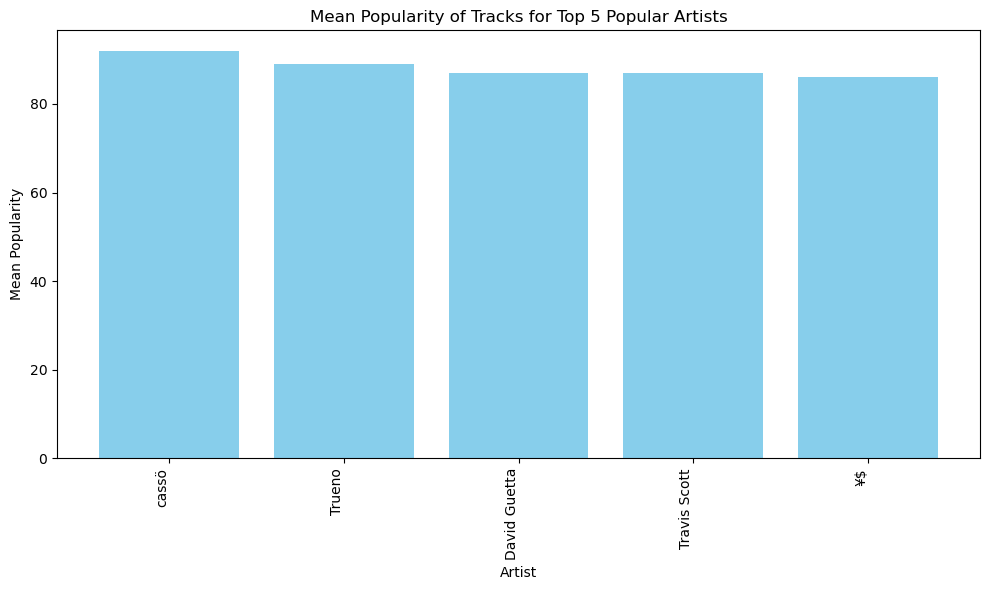

In [41]:
#Que1 
plt.figure(figsize=(10, 6))
plt.bar(top_5_artists['Artist'], top_5_artists['Popularity'], color='skyblue')
plt.xlabel('Artist')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity of Tracks for Top 5 Popular Artists')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [42]:
#Que2
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [51]:
songs =  df.groupby('Track Name')['Popularity'].mean().reset_index().sort_values(by='Popularity',ascending=False)[0:5]
songs

,Track Name,Popularity
181,Lovin On Me,97.0
410,redrum,96.0
57,CARNIVAL,96.0
87,FE!N (feat. Playboi Carti),93.0
259,Prada,92.0


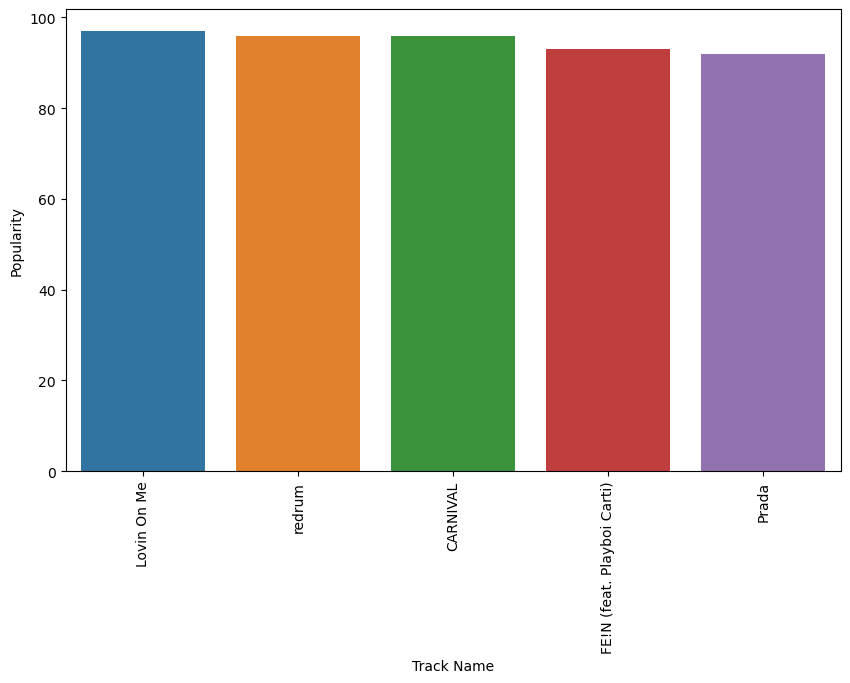

In [53]:
plt.figure(figsize=(10,6))
plt.xlabel("Songs")
plt.ylabel("Popularity")
plt.xticks(rotation=90)
sns.barplot(x='Track Name',y='Popularity',data=songs)
plt.show()

In [76]:
#Que4
grouped_df = df.groupby(['Track Name', 'Popularity', 'Duration (ms)']).size().reset_index()


In [80]:
grouped_df.drop(columns=0, inplace=True)

In [96]:
longest_duration=grouped_df.sort_values(by='Duration (ms)',ascending=False).head(5).reset_index()

In [98]:
longest_duration.drop(columns='index',inplace=True)

In [99]:
longest_duration

,Track Name,Popularity,Duration (ms)
0,"GOD DID (feat. Rick Ross, Lil Wayne, Jay-Z, Jo...",64,501648
1,Stan,84,404106
2,Money Trees,82,386906
3,SKITZO (feat. Young Thug),78,366592
4,Forever,77,357706


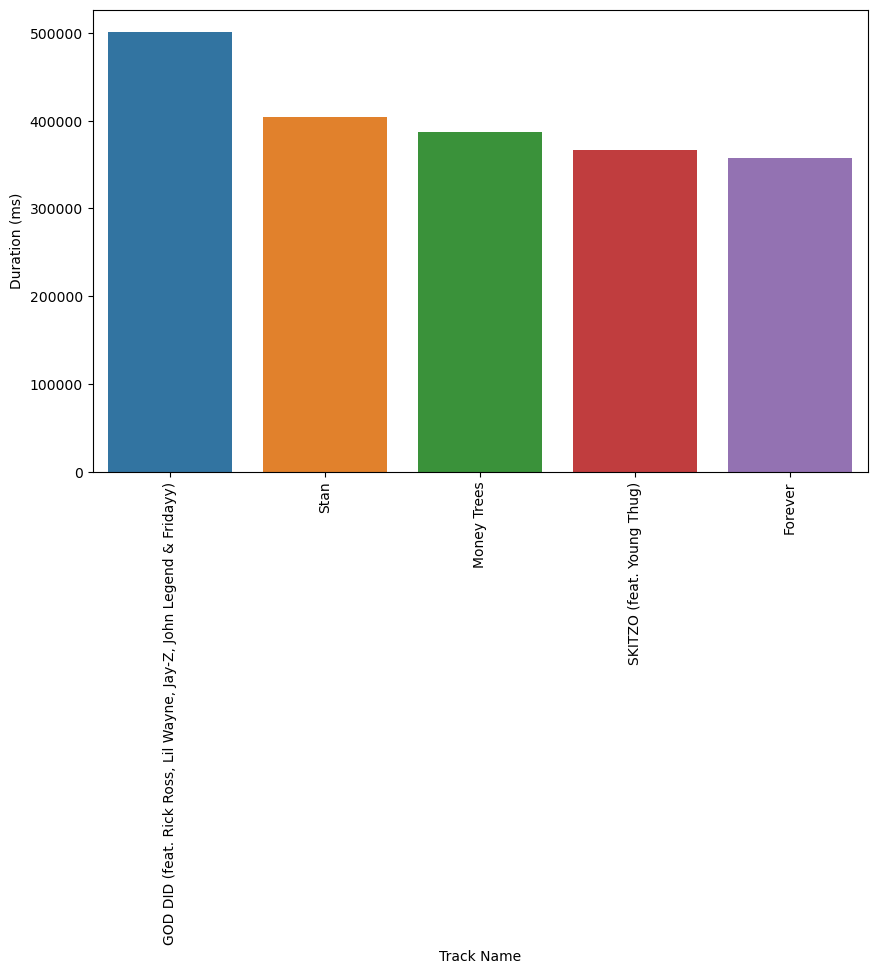

In [100]:
plt.figure(figsize=(10,6))
plt.xlabel("Songs")
plt.ylabel("Duration")
plt.xticks(rotation=90)
sns.barplot(x='Track Name',y='Duration (ms)',data=longest_duration)
plt.show()

In [101]:
df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [116]:
#Que5
danceable_songs=df.sort_values(by='Popularity', ascending=False).head(5).reset_index()

In [118]:
danceable_songs.drop(columns='index',inplace=True)

In [119]:
danceable_songs

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Jack Harlow,Lovin On Me,97,138411,4xhsWYTOGcal8zt0J161CU
1,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
2,21 Savage,redrum,96,270697,52eIcoLUM25zbQupAZYoFh
3,¥$,CARNIVAL,96,264324,3w0w2T288dec0mgeZZqoNN
4,Travis Scott,FE!N (feat. Playboi Carti),93,191700,42VsgItocQwOQC3XWZ8JNA


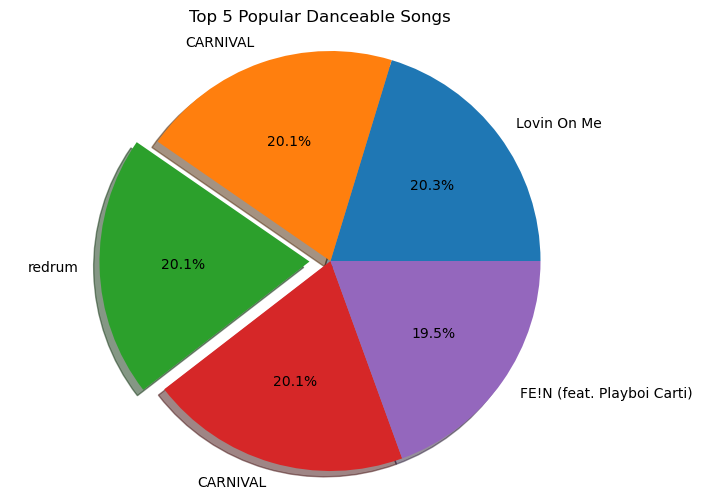

In [128]:
plt.figure(figsize=(8, 6))
my_explode=[0.0,0.0,0.1,0.0,0.0]
plt.pie(danceable_songs['Popularity'], labels=danceable_songs['Track Name'],explode=my_explode,autopct='%1.1f%%', shadow=True)
plt.title('Top 5 Popular Danceable Songs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

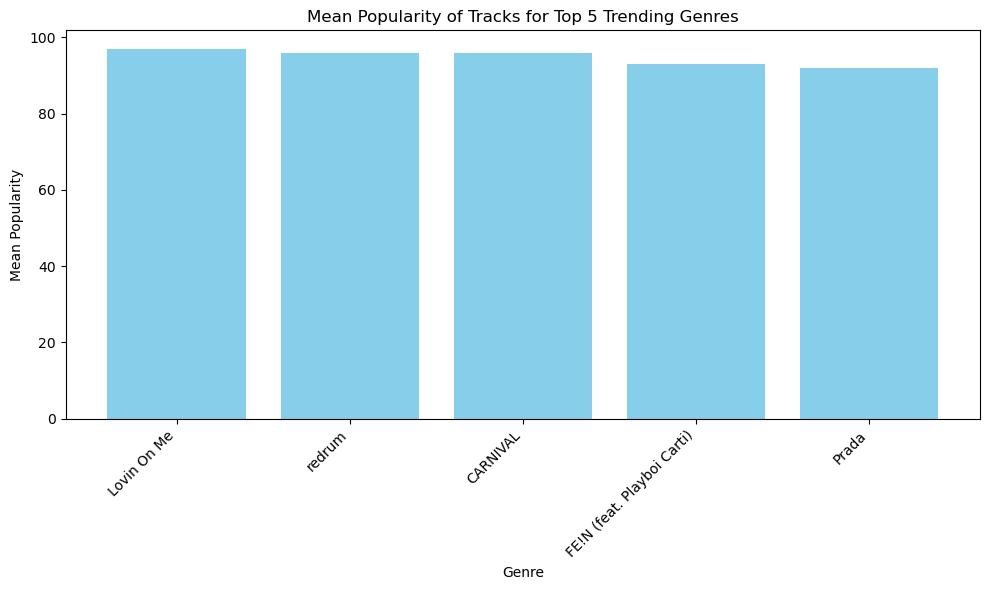

In [130]:
#Que3
mean_popularity_by_genre = df.groupby('Track Name')['Popularity'].mean().reset_index()

top_5_trending_genres = mean_popularity_by_genre.sort_values(by='Popularity', ascending=False).head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_5_trending_genres['Track Name'], top_5_trending_genres['Popularity'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Mean Popularity')
plt.title('Mean Popularity of Tracks for Top 5 Trending Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()